In [ ]:
library(tidyverse)
library(liana)
library(Seurat)

In [4]:
show_methods()

[1] "connectome"      "logfc"           "natmi"           "sca"            
 [5] "cellphonedb"     "cytotalk"        "call_squidpy"    "call_cellchat"  
 [9] "call_connectome" "call_sca"        "call_italk"      "call_natmi"

## subtype

In [5]:
setwd("./")

In [6]:
liana_path <- system.file(package = "liana")
test <- readRDS("OO+GC+TC.dis20.final.rds")

In [ ]:
Idents(test)=test@meta.data$subtype
names=c("C1","C2","C3","C4")
liana={}
for(i in (1:length(names))){
    type <- subset(test,idents=names[i])
    type$seurat_annotations <- type@meta.data$orig.ident
    Idents(type)=type@meta.data$orig.ident
    liana_test <- liana_wrap(type)
    liana_test <- liana_test %>% liana_aggregate()
    liana[[i]] <- liana_test %>% filter(aggregate_rank <= 0.05) 
    options(repr.plot.width =5,repr.plot.height =4.4)
    pdf(paste0("OO+GC+TC.dis20",names[i],".pdf"),w=3,h=2.5)  
    heat_freq(liana[[i]])
    dev.off()
    write.table(liana[[i]],paste0("OO+GC+TC.dis20",names[i],".xls"),sep="\t")

}

In [16]:
test@meta.data$subtype2=paste0(test@meta.data$orig.ident,"-",test@meta.data$subtype)

In [8]:
test$seurat_annotations <- test@meta.data$subtype2

In [9]:
Idents(test)=test@meta.data$subtype2

In [ ]:
liana_test <- liana_wrap(test)

In [ ]:
liana_test <- liana_test %>% liana_aggregate()

png 
  2

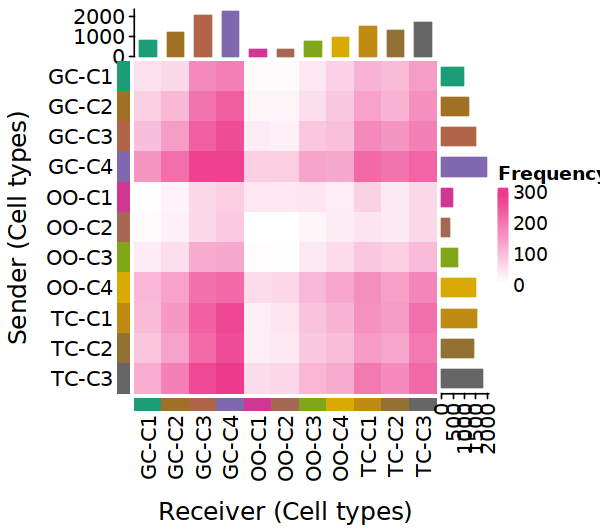

In [19]:
liana_trunc <- liana_test %>%
  filter(aggregate_rank <= 0.05) 
options(repr.plot.width =5,repr.plot.height =4.4)
pdf("OO+GC+TC.dis20.liana.subtype2.pdf",w=5,h=4.4)
heat_freq(liana_trunc)
dev.off()
heat_freq(liana_trunc)

In [20]:
write.table(liana_trunc,"OO+GC+TC.dis20.liana.subtype.xls",sep="\t")

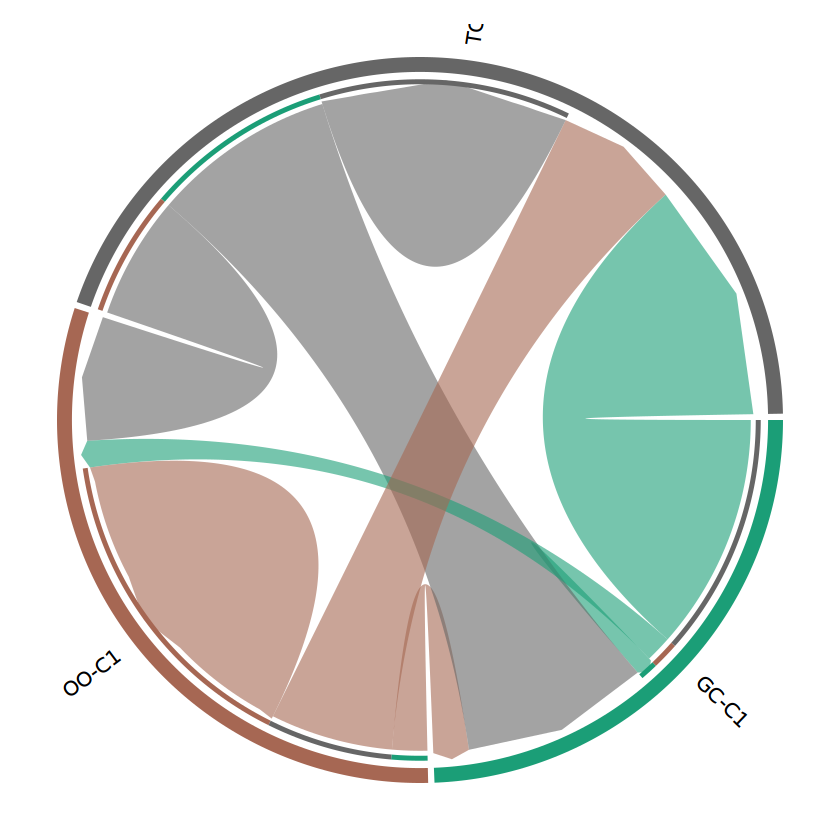

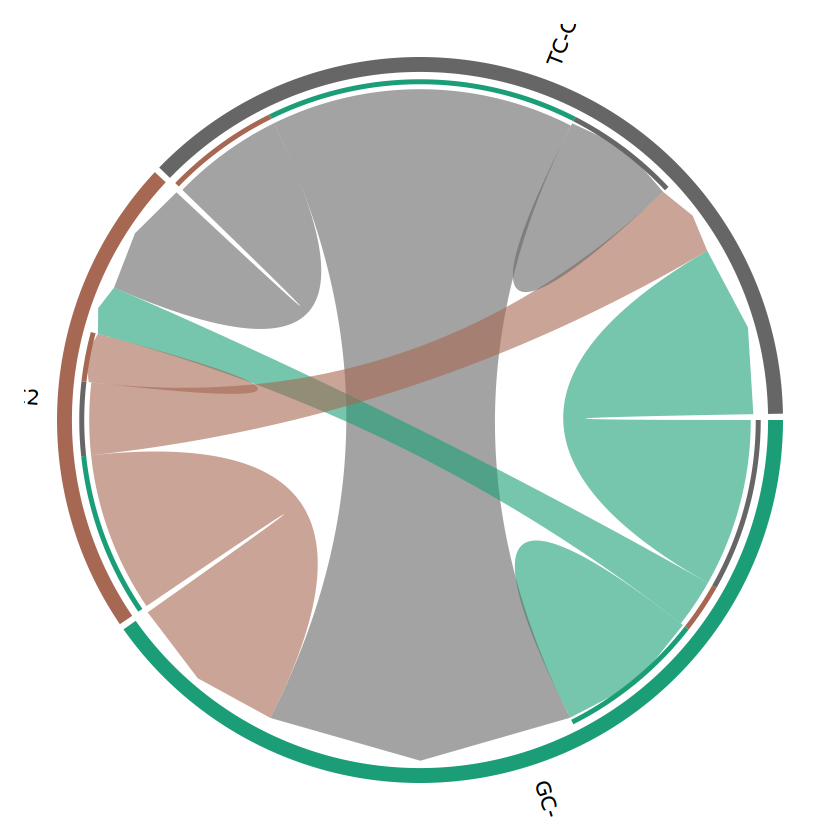

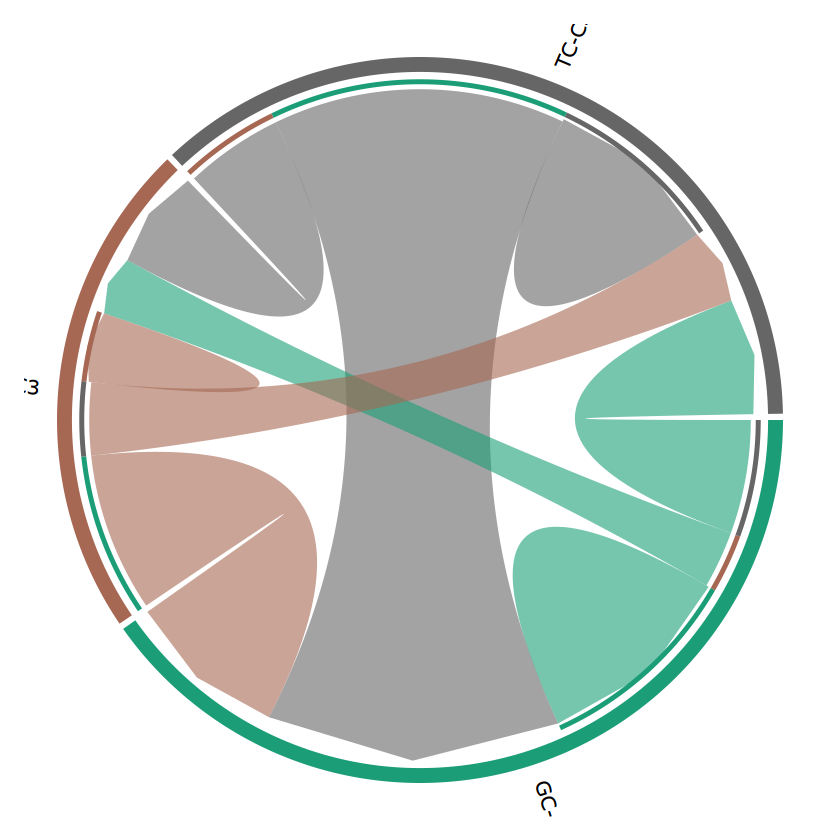

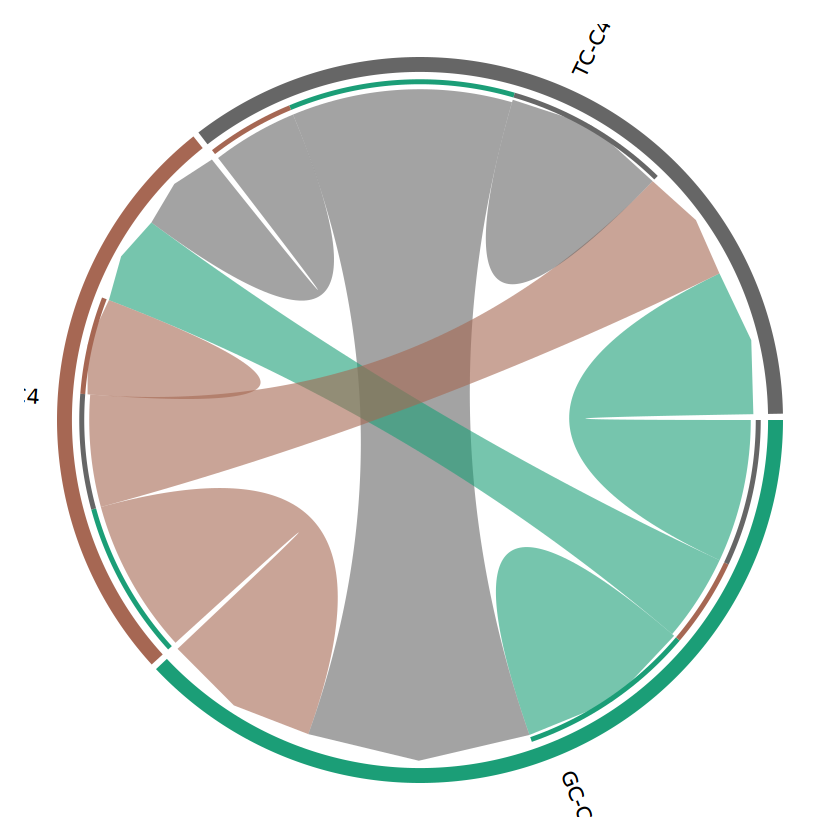

In [30]:
p1 <- chord_freq(liana_trunc,
                source_groups = c("GC-C1", "OO-C1", "TC-C1"),
                target_groups = c("GC-C1", "OO-C1", "TC-C1"))
p2 <- chord_freq(liana_trunc,
                source_groups = c("GC-C2", "OO-C2", "TC-C2"),
                target_groups = c("GC-C2", "OO-C2", "TC-C2"))
p3 <- chord_freq(liana_trunc,
                source_groups = c("GC-C3", "OO-C3", "TC-C3"),
                target_groups = c("GC-C3", "OO-C3", "TC-C3"))
p4 <- chord_freq(liana_trunc,
                source_groups = c("GC-C4", "OO-C4", "TC-C4"),
                target_groups = c("GC-C4", "OO-C4", "TC-C4"))

## celltype

In [25]:
test$seurat_annotations <- test@meta.data$orig.ident
Idents(test)=test@meta.data$orig.ident

In [ ]:
liana_celltype <- liana_wrap(test)

In [ ]:
liana_celltype <- liana_celltype %>% liana_aggregate()

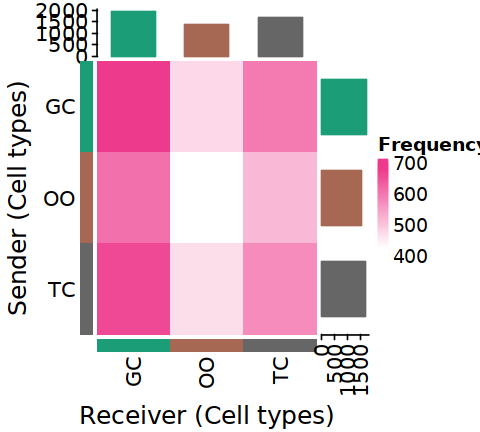

In [ ]:
liana_trunc <- liana_celltype %>%
  filter(aggregate_rank <= 0.05) 
options(repr.plot.width =4,repr.plot.height =3.6)
pdf("OO+GC+TC.dis20.liana.type.pdf",w=4,h=3.5)
heat_freq(liana_celltype)
dev.off()
heat_freq(liana_celltype)

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Warning message:
“CombinePlots is being deprecated. Plots should now be combined using the patchwork system.”


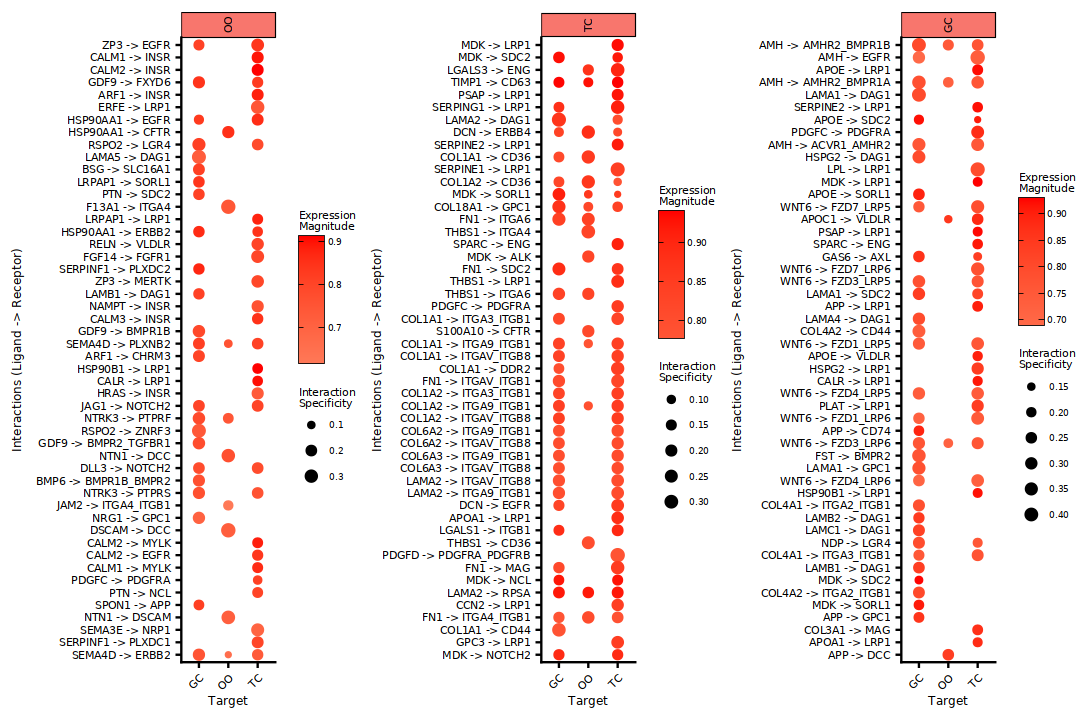

In [34]:
options(repr.plot.width =9,repr.plot.height =6)
p=liana_trunc %>%
  liana_dotplot(source_groups = c("OO"),
                target_groups = c("OO", "GC","TC"),
                ntop = 50,size_range = c(1, 3))+scale_color_gradient2(low = "blue",high = "red",guide = guide_colorbar(ticks.colour = "black",frame.colour = "black"))+cowplot::theme_cowplot()+mytheme_dot
p2=liana_trunc %>%
  liana_dotplot(source_groups = c("TC"),
                target_groups = c("OO", "GC","TC"),
                ntop = 50,size_range = c(1, 3))+scale_color_gradient2(low = "blue",high = "red",guide = guide_colorbar(ticks.colour = "black",frame.colour = "black"))+cowplot::theme_cowplot()+mytheme_dot
p3=liana_trunc %>%
  liana_dotplot(source_groups = c("GC"),
                target_groups = c("OO", "GC","TC"),
                ntop = 50,size_range = c(1, 3))+scale_color_gradient2(low = "blue",high = "red",guide = guide_colorbar(ticks.colour = "black",frame.colour = "black"))+cowplot::theme_cowplot()+mytheme_dot
p=CombinePlots(
  plots = list(p,p2,p3),
  #nrow =6,
  ncol=3 
)
p
ggsave("OO+GC+TC.dis20.liana.celltype.pdf",w=9,h=6)

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Warning message:
“CombinePlots is being deprecated. Plots should now be combined using the patchwork system.”


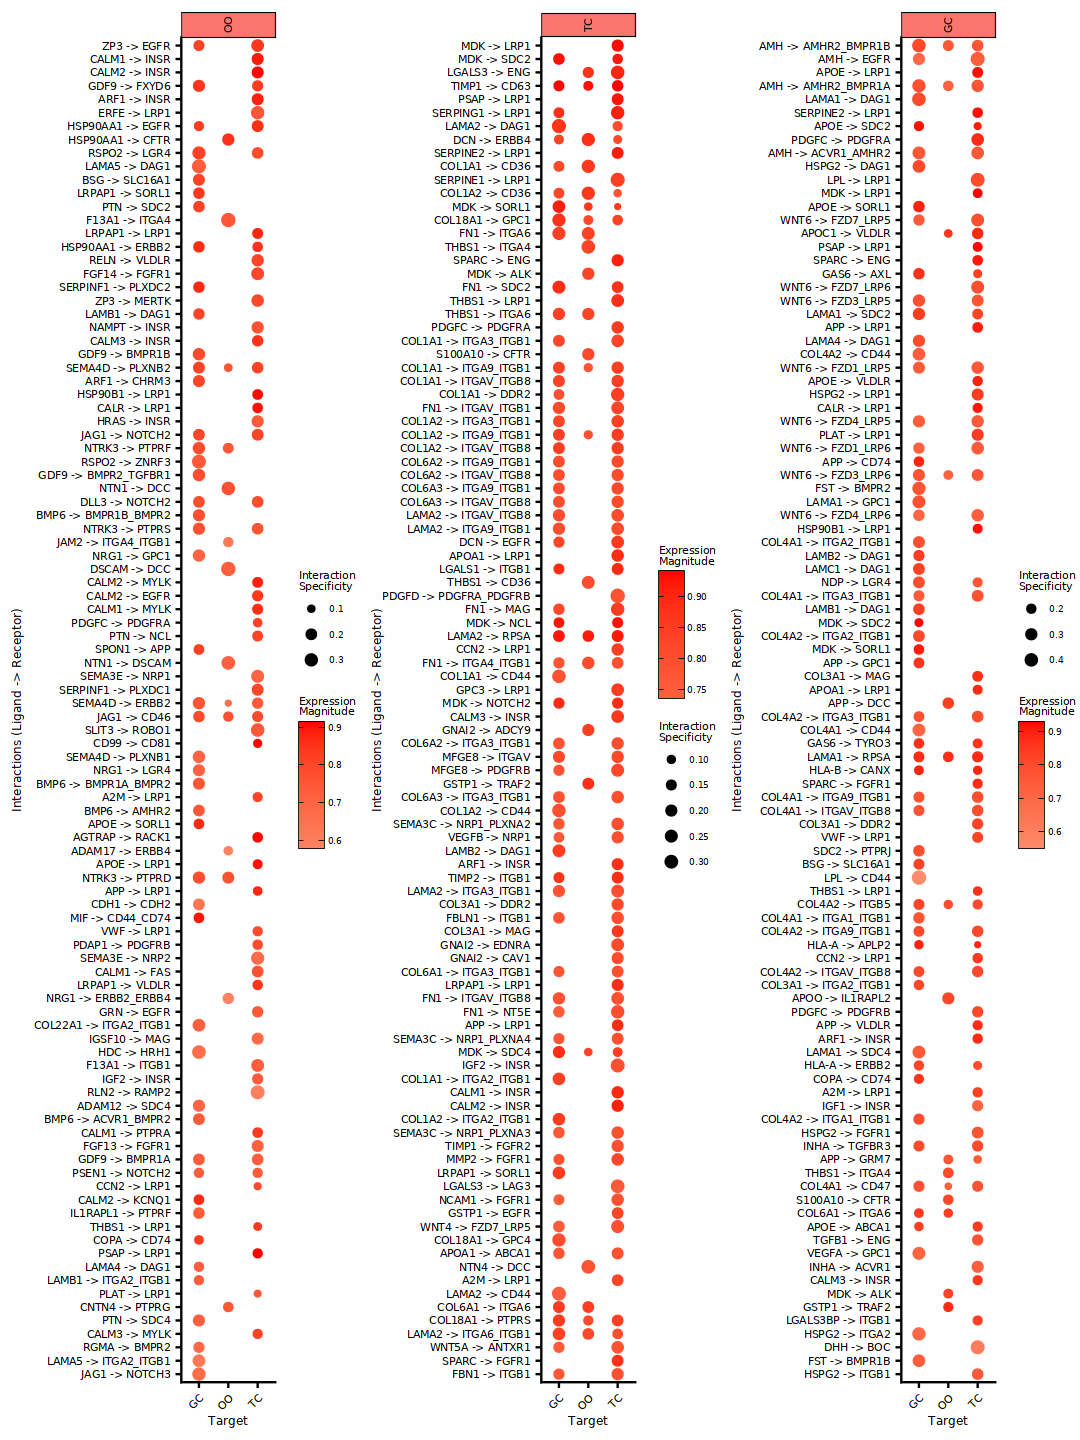

In [ ]:
options(repr.plot.width =9,repr.plot.height =12)
p=liana_trunc %>%
  liana_dotplot(source_groups = c("OO"),
                target_groups = c("OO", "GC","TC"),
                ntop = 100,size_range = c(1, 3))+scale_color_gradient2(low = "blue",high = "red",guide = guide_colorbar(ticks.colour = "black",frame.colour = "black"))+cowplot::theme_cowplot()+mytheme_dot
p2=liana_trunc %>%
  liana_dotplot(source_groups = c("TC"),
                target_groups = c("OO", "GC","TC"),
                ntop = 100,size_range = c(1, 3))+scale_color_gradient2(low = "blue",high = "red",guide = guide_colorbar(ticks.colour = "black",frame.colour = "black"))+cowplot::theme_cowplot()+mytheme_dot
p3=liana_trunc %>%
  liana_dotplot(source_groups = c("GC"),
                target_groups = c("OO", "GC","TC"),
                ntop = 100,size_range = c(1, 3))+scale_color_gradient2(low = "blue",high = "red",guide = guide_colorbar(ticks.colour = "black",frame.colour = "black"))+cowplot::theme_cowplot()+mytheme_dot
p=CombinePlots(
  plots = list(p,p2,p3),
  #nrow =6,
  ncol=3 
)
p
ggsave("OO+GC+TC.dis20.liana.celltypetop100.pdf",w=9,h=12)

In [45]:
liana_trunc$ligand.receptor=paste0(liana_trunc$ligand.complex,"->",liana_trunc$receptor.complex)

In [47]:
subset <- liana_trunc[grepl(paste(keywords, collapse = "|"), liana_trunc$ligand.receptor), ]

Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


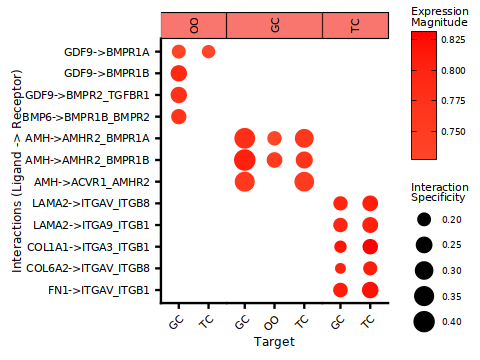

In [60]:

subset$source <- factor(subset$source,levels=c("OO","GC","TC"))
subset$ligand.receptor <- factor(subset$ligand.receptor,levels=rev(keywords))
cbPalette <- c("#E69F00", "#56B4E9",
                   "#009E73", "#F0E442", "#0072B2",
                   "#D55E00", "#CC79A7", "#DF69A7")
p=ggplot(subset,
               aes(x = target,
                   y = ligand.receptor,
                   colour = sca.LRscore,
                   size = natmi.edge_specificity,
                   group = target
               )) +
            geom_point() +
            scale_color_gradientn(colours = viridis::viridis(20)) +
            scale_size_continuous(range = c(2, 5)) +
            facet_grid(. ~ source,
                       space = "free",
                       scales ="free",
                       switch = "y")  + 
         labs(y = "Interactions (Ligand -> Receptor)",
                 colour = "Expression\nMagnitude",,
                 size = "Interaction\nSpecificity",,
                 x = "Target",
                 title= "Source"
            ) +
            theme_bw(base_size = 20) +
            theme(
                legend.text = element_text(size = 16),
                axis.text.x = element_text(colour =
                                               cbPalette[1:length(
                                                   unique(subset$source)
                                               )],
                                           face = "bold",
                                           size = 23),
                axis.title.x = element_text(colour = "gray6"),
                axis.text.y = element_text(size = 18,
                                           vjust = 0.5),
                legend.title = element_text(size = 18),
                panel.spacing = unit(0.1, "lines"),
                strip.background = element_rect(fill = NA),
                plot.title = element_text(vjust = 0, hjust=0.5, colour = "gray6"),
                strip.text = element_text(size = 24, colour = "gray6")
                )+scale_color_gradient2(low = "blue",high = "red",guide = guide_colorbar(ticks.colour = "black",frame.colour = "black"))+cowplot::theme_cowplot()+mytheme_dot
                # strip.text.y.left = element_text(angle = 0)

options(repr.plot.width =4,repr.plot.height =3)
p
ggsave("OO+GC+TC.dis20.liana.sig.pdf",plot=p,h=4,w=3)

In [ ]:
subset_oo <- subset[subset$source=="OO",]
subset_oo$ligand.receptor <- factor(subset_oo$ligand.receptor,levels=keywords)

#subset$source <- factor(subset$source,levels=c("OO","GC","TC"))
subset_oo$ligand.receptor <- factor(subset_oo$ligand.receptor,levels=rev(keywords))
cbPalette <- c("#E69F00", "#56B4E9",
                   "#009E73", "#F0E442", "#0072B2",
                   "#D55E00", "#CC79A7", "#DF69A7")
p=ggplot(subset_oo,
               aes(x = target,
                   y = ligand.receptor,
                   colour = sca.LRscore,
                   size = natmi.edge_specificity,
                   group = target
               )) +
            geom_point() +
            scale_color_gradientn(colours = viridis::viridis(20)) +
            scale_size_continuous(range = c(2, 5)) +
            facet_grid(. ~ source,
                       space = "free",
                       scales ="free",
                       switch = "y")  + 
         labs(y = "Interactions (Ligand -> Receptor)",
                 colour = "Expression\nMagnitude",,
                 size = "Interaction\nSpecificity",,
                 x = "Target",
                 title= "Source"
            ) +
            theme_bw(base_size = 20) +
            theme(
                legend.text = element_text(size = 16),
                axis.text.x = element_text(colour =
                                               cbPalette[1:length(
                                                   unique(subset$source)
                                               )],
                                           face = "bold",
                                           size = 23),
                axis.title.x = element_text(colour = "gray6"),
                axis.text.y = element_text(size = 18,
                                           vjust = 0.5),
                legend.title = element_text(size = 18),
                panel.spacing = unit(0.1, "lines"),
                strip.background = element_rect(fill = NA),
                plot.title = element_text(vjust = 0, hjust=0.5, colour = "gray6"),
                strip.text = element_text(size = 24, colour = "gray6")
                )+scale_color_gradient2(low = "blue",high = "red",guide = guide_colorbar(ticks.colour = "black",frame.colour = "black"))+cowplot::theme_cowplot()+mytheme_dot
                # strip.text.y.left = element_text(angle = 0)

options(repr.plot.width =4,repr.plot.height =3)
p
ggsave("OO+GC+TC.dis20.liana.OO.pdf",plot=p,h=4,w=3)

In [44]:
keywords <- c(
    "GDF9->BMPR1A",
  "GDF9->BMPR1B",
  "GDF9->BMPR2_TGFBR1",
  "BMP6->BMPR1B_BMPR2",
    "AMH->AMHR2_BMPR1A",
  "AMH->AMHR2_BMPR1B",
  
  "AMH->ACVR1_AMHR2",
  "LAMA2->ITGAV_ITGB8",
  "LAMA2->ITGA9_ITGB1",
  "COL1A1->ITGA3_ITGB1",
  "COL6A2->ITGAV_ITGB8",
  "FN1->ITGAV_ITGB1"
)
keywordstc <- keywords
keywordsgc <-keywords
keywordsoo <-keywords
liana_trunc$ligand.receptor <- factor(liana_trunc$ligand.receptor,levels=keywords)
subset_tc <- liana_trunc[grepl(paste(keywordstc, collapse = "|"), liana_trunc$ligand.receptor), ]
subset_tc$ligand.receptor <- factor(subset_tc$ligand.receptor,levels=keywords)
subset_gc <- liana_trunc[grepl(paste(keywordsgc, collapse = "|"), liana_trunc$ligand.receptor), ]
subset_gc$ligand.receptor <- factor(subset_gc$ligand.receptor,levels=keywords)
subset_oo <- liana_trunc[grepl(paste(keywordsoo, collapse = "|"), liana_trunc$ligand.receptor), ]
subset_oo$ligand.receptor <- factor(subset_oo$ligand.receptor,levels=keywords)
subset_oo$source <- factor(subset_oo$source,levels=c("OO","GC","TC"))

In [16]:
table(subset_tc$ligand.receptor )


       GDF9->BMPR1A        GDF9->BMPR1B  GDF9->BMPR2_TGFBR1  BMP6->BMPR1B_BMPR2 
                  2                   1                   1                   1 
  AMH->AMHR2_BMPR1A   AMH->AMHR2_BMPR1B    AMH->ACVR1_AMHR2  LAMA2->ITGAV_ITGB8 
                  3                   3                   2                   2 
 LAMA2->ITGA9_ITGB1 COL1A1->ITGA3_ITGB1 COL6A2->ITGAV_ITGB8    FN1->ITGAV_ITGB1 
                  2                   2                   2                   2 

In [13]:
new_keywords <- unique(sapply(strsplit(keywords, "->"), function(x) x[1]))

In [14]:
new_keywords

[1] "GDF9"   "BMP6"   "AMH"    "LAMA2"  "COL1A1" "COL6A2" "COL6A3" "FN1"

In [12]:
mytheme_dot= theme(
    plot.title=element_blank(),
    axis.title = element_text(size =7,color ="black"),
    axis.text = element_text(size=6,color = "black"),
    legend.text = element_text(size=5),
    legend.title= element_text(size= 6),
    axis.text.x = element_text(angle = 45, hjust=1, vjust=1),
    plot.margin = unit(c(0.5,0.5,0.5,0.5),"lines"),
    panel.spacing=unit(0.1, "mm"),
    strip.background.x = element_rect(
     color="black", fill=c( "#F8766D","#DE8C00","#B79F00"), size=0.25
     ),
   strip.placement = "inside",
   strip.switch.pad.grid = unit(2, "cm"),
   strip.switch.pad.wrap = unit(2, "cm"),
    strip.text.x = element_text(size=6,angle=90, color = "black",vjust = 0.5,margin = margin(b = 3,t=3))#分面标签样>式
    
)


Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


In [38]:
#' Liana dotplot interactions by source and target cells
#'
#' @param liana_res aggregated `liana_wrap` results from multiple methods,
#' or alternatively results from running `liana_wrap` with a single method.
#' Should be filtered by some condition (e.g. preferential consesus ranking,
#' specific interactions, etc).
#'
#' @param source_groups names of the source (sender) cell types (NULL = no filter)
#' @param target_groups names of the target cell types (NULL = no filter)
#'
#' @param ntop number of interactions to return. Note that this assumes
#' that the tibble is sorted in descending order of interaction importance!
#'
#' @param magnitude column to represent interactions expression magnitude
#' (by default `sca.LRscore`)
#'
#' @param specificity column to represent the dot-size of the interaction
#' (by default `natmi.edge_specificity`)
#'
#' @param y.label y label name
#' @param size.label size (~specificty) label name
#' @param colour.label colour (~magnitude) label name
#'
#' @param show_complex logical whether to show complexes (default - TRUE) or
#'  only the subunit with minimum expression.
#'
#' @details Here, we refer to `specificity` as how specific this interaction is
#' to a cell type pair regards to the rest of the cell type pairs (
#' e.g. CellPhoneDB's p-values, NATMI's specificity edges, Connectome's scaled weights, etc)
#'
#' `magnitude` on the other hand is a direct measure of the expression alone,
#' by default we use SingleCellSignalR's dataset indepent LRscore (bound between 0 and 1).
#' Yet, one could also use CellChat's probabilities or CellPhoneDB's means, etc.
#'
#' @import ggplot2 dplyr
#' @importFrom magrittr %<>%
#'
#' @return a ggplot2 object
#'
#' @export
liana_dotplot <- function(liana_res,
                          source_groups = NULL,
                          target_groups = NULL,
                          ntop = NULL,
                          specificity = "natmi.edge_specificity",
                          magnitude = "sca.LRscore",
                          y.label = "Interactions (Ligand -> Receptor)",
                          size.label = "Interaction\nSpecificity",
                          colour.label = "Expression\nMagnitude",
                          show_complex = TRUE,
                          size_range = c(2, 10),
                          invert_specificity = FALSE,
                          invert_magnitude = FALSE,
                          invert_function = function(x) -log10(x + 1e-10)
                          ){

    if(show_complex){
        entities <- c("ligand.complex", "receptor.complex")
    } else{
        entities <- c("ligand", "receptor")
    }

    # Modify for the plot
    liana_mod <- liana_res %>%
        # Filter to only the cells of interest
        `if`(!is.null(source_groups),
             filter(., source %in% source_groups),
             .) %>%
        `if`(!is.null(target_groups),
             filter(., target %in% target_groups),
             .)


    if(!is.null(ntop)){
        # Subset to the X top interactions
        top_int <- liana_mod %>% distinct_at(entities) %>% head(ntop)
        liana_mod %<>% inner_join(top_int, by=entities)
    }

    if(invert_magnitude){
        liana_mod %<>% mutate(!!magnitude := invert_function(.data[[magnitude]]))
    }
    if(invert_specificity){
        liana_mod %<>% mutate(!!specificity := invert_function(.data[[specificity]]))
    }

    liana_mod %<>%
        rename(magnitude = !!magnitude) %>%
        rename(specificity = !!specificity) %>%
        unite(entities, col = "interaction", sep = " -> ") %>%
        unite(c("source", "target"), col = "source_target", remove = FALSE)



    # ensure levels & order is kept the plot
    interactions_order <- liana_mod %>% pull("interaction") %>% unique()
    liana_mod %<>%
        mutate(interaction = factor(interaction, levels=rev(interactions_order))) %>%
        mutate(across(where(is.character), as.factor))

    # colour blind palette from http://www.cookbook-r.com/Graphs/Colors_(ggplot2)/
    cbPalette <- c("#E69F00", "#56B4E9",
                   "#009E73", "#F0E442", "#0072B2",
                   "#D55E00", "#CC79A7", "#DF69A7")

    # plot
    suppressWarnings(
        ggplot(liana_mod,
               aes(x = target,
                   y = interaction,
                   colour = magnitude,
                   size = specificity,
                   group = target
               )) +
            geom_point() +
            scale_color_gradientn(colours = viridis::viridis(20)) +
            scale_size_continuous(range = size_range) +
            facet_grid(. ~ source,
                       space = "free",
                       scales ="free",
                       switch = "y")  +
            # scale_x_discrete(position = "right") +
            labs(y = y.label,
                 colour = colour.label,
                 size = size.label,
                 x = "Target",
                 title= "Source"
            ) +
            theme_bw(base_size = 20) +
            theme(
                legend.text = element_text(size = 16),
                axis.text.x = element_text(colour =
                                               cbPalette[1:length(
                                                   unique(liana_mod$source)
                                               )],
                                           face = "bold",
                                           size = 23),
                axis.title.x = element_text(colour = "gray6"),
                axis.text.y = element_text(size = 18,
                                           vjust = 0.5),
                legend.title = element_text(size = 18),
                panel.spacing = unit(0.1, "lines"),
                strip.background = element_rect(fill = NA),
                plot.title = element_text(vjust = 0, hjust=0.5, colour = "gray6"),
                strip.text = element_text(size = 24, colour = "gray6") #,
                # strip.text.y.left = element_text(angle = 0)
            )
    )
}



#' Frequency ChordDiagram
#'
#' @inheritParams liana_dotplot
#' @param cex label relative font size
#'
#' @param ... other paramters passed to `circlize::chordDiagram`
#' @param transparency transparency
#'
#' @param facing axis label rotation (check `circlize::circos.text` for options)
#' @param offset for text.
#'
#' @export
chord_freq <- function(liana_res,
                       source_groups = NULL,
                       target_groups = NULL,
                       cex = 1,
                       transparency = 0.4,
                       facing = "clockwise",
                       adj = c(-0.5, 0.05),
                       ...){

    # Get Frequencies for the celltypes of interest
    freqs <- liana_res %>%
        `if`(!is.null(source_groups),
             filter(., source %in% source_groups),
             .) %>%
        `if`(!is.null(target_groups),
             filter(., target %in% target_groups),
             .) %>%
        .get_freq()

    celltypes <- union(colnames(freqs), rownames(freqs))

    grid.col <- grDevices::colorRampPalette(
        (RColorBrewer::brewer.pal(n = 8, name = 'Dark2'))
    )(length(celltypes)) %>%
        setNames(celltypes)

    # 4ord plot
    circlize::circos.clear()
    circlize::chordDiagram(freqs,
                           directional = 1,
                           direction.type = c("diffHeight", "arrows"),
                           link.arr.type = "big.arrow",
                           transparency = transparency,
                           grid.col = grid.col,
                           annotationTrack = c("grid"),
                           self.link = 1,
                           big.gap = 7.5,
                           small.gap = 5,
                           ...
    )

    # Taken from https://stackoverflow.com/questions/31943102/rotate-labels-in-a-chorddiagram-r-circlize
    circlize::circos.trackPlotRegion(track.index = 1,
                                     panel.fun = function(x, y) {
        xlim = circlize::get.cell.meta.data("xlim")
        ylim = circlize::get.cell.meta.data("ylim")
        sector.name = circlize::get.cell.meta.data("sector.index")
        circlize::circos.text(mean(xlim), ylim[1],
                              sector.name, facing = facing,
                              niceFacing = TRUE, adj = adj, cex = cex)
    }, bg.border = NA)

    p <- grDevices::recordPlot()

    return(p)
}


#' Communication Frequency heatmap plot
#'
#' @param liana_res aggregated liana results (preferably truncated
#'  to some threshold)
#' @inheritDotParams liana_heatmap
#'
#' @export
#'
#' @details This plot was inspired by CellPhoneDB and also CellChat's heatmap design.
#' It makes the assumption that the number of interactions inferred between cell
#' types is informative of the communication events occurring in the system as a whole.
#' This is a rather strong assumption limited by the arbitrarily filtered
#' interactions Thus, I suggest that one limits any conclusions, unless supported
#' by complimentary information, such as biological prior knowledge.
heat_freq <- function(liana_res, ...){
    # Calculate Frequencies
    freqs <- liana_res %>%
        .get_freq()

    liana_heatmap(mat = freqs,
                  ...)
}


#' Communication by cell type Heatmap
#'
#' @param mat Diagonal celltype-celltype matrix to be plotted. In theory,
#' any metric deemed meaningful between cell pairs can be plotted.
#' @param font_size base font_size - other fontsizes are relative to this one
#' @param grid_text logical whether to display grid text or not
#' @param name name of the heatmap.
#' By default the heatmap name is used as the title of the heatmap legend.
#' @param row_title Row tittle
#' @param column_title Column tittle
#'
#' @param ... parameters passed to `ComplexHeatmap::Heatmap`
#'
#' @export
#'
#' @importFrom ComplexHeatmap Heatmap HeatmapAnnotation rowAnnotation anno_barplot
#' @importFrom grid gpar unit grid.text
#'
#' @details Heatmap function inspired by CellPhoneDBv3 and CellChat's designs
#' on communication heatmaps.
liana_heatmap <- function(mat,
                          font_size = 12,
                          grid_text = FALSE,
                          name = 'Frequency',
                          pallette = c("white", "violetred2"),
                          row_title = "Sender (Cell types)",
                          column_title = "Receiver (Cell types)",
                          ...){

    if(grid_text){
        grid_text <- function(j, i, x, y, width, height, fill) {
            grid_text <- grid.text(sprintf("%d", mat[i, j]),
                                   x, y, gp = gpar(fontsize = font_size*0.83))
        }
    } else{
        grid_text <- NULL
    }

    # define Annotations and Barplots
    cell_anno <- unique(rownames(mat))
    cell_anno <- grDevices::colorRampPalette(
        (RColorBrewer::brewer.pal(n = 8, name = 'Dark2'))
    )(length(cell_anno)) %>%
        setNames(cell_anno)

    ## Annotations
    ha_opts <- list(show_legend = FALSE,
                    show_annotation_name = FALSE,
                    col = list("anno"=cell_anno),
                    simple_anno_size = grid::unit(0.25, "cm"))
    column_ha <- exec("HeatmapAnnotation", anno = names(cell_anno), !!!ha_opts)
    row_ha <- exec("rowAnnotation", anno = names(cell_anno), !!!ha_opts)

    # Barplots
    column_bar <- ComplexHeatmap::HeatmapAnnotation(
        bar = .anno_barplot(colSums(mat),
                            cell_anno,
                            axis.font.size = font_size*0.5
                            ),
        annotation_name_gp = gpar(fontsize = font_size*0.5),
        show_legend = FALSE,
        show_annotation_name = FALSE)

    row_bar <- ComplexHeatmap::rowAnnotation(
        bar2 = .anno_barplot(rowSums(mat),
                             cell_anno,
                             font_size*0.5
                             ),
        gp = gpar(fill = cell_anno,
                  col = cell_anno),
        show_legend = FALSE,
        show_annotation_name = FALSE)

    # Heatmap
    ComplexHeatmap::Heatmap(mat,
                            col=colorRampPalette(pallette)(10),
                            cluster_rows = FALSE,
                            cluster_columns = FALSE,
                            row_names_side = "left",
                            top_annotation = column_bar,
                            bottom_annotation = column_ha,
                            right_annotation = row_bar,
                            left_annotation = row_ha,
                            row_title = row_title,
                            row_names_gp = gpar(fontsize = font_size),
                            row_title_gp = gpar(fontsize = font_size*1.2),
                            column_names_gp = gpar(fontsize = font_size),
                            column_title = column_title,
                            column_title_gp = gpar(fontsize = font_size*1.2),
                            column_title_side = "bottom",
                            heatmap_legend_param = list(title_gp = gpar(fontsize = font_size*0.9,
                                                                        fontface = 'bold'),
                                                        border = NA,
                                                        labels_gp = gpar(fontsize = font_size*0.9),
                                                        grid_width = unit(2, "mm")),
                            name = name,
                            cell_fun = grid_text,
                            ...
    )

}


#' Helper Function to Generate Annotation Barplots
#'
#' @param x numeric vector
#' @param cell_anno vector of colour codes named by cell type annotations
#' @param axis.font.size fontsize of the barplots axis font size
#'
#' @noRd
.anno_barplot <- function(x,
                          cell_anno,
                          axis.font.size){
    anno_barplot(x,
                 gp = gpar(fill = cell_anno,
                           col = cell_anno,
                           font.size=axis.font.size),
                 axis_param = list(gp=gpar(font.size=axis.font.size)),
                 title="",
                 border = FALSE)
}


#' Helper function to obtain interaction frequencies
#'
#' @param liana_res liana-formatted results
#'
#' @noRd
.get_freq <- function(liana_res){
    liana_res %>%
        group_by(source, target) %>%
        summarise(freq = n(), .groups = 'keep') %>%
        pivot_wider(id_cols = source,
                    names_from = target,
                    values_from = freq,
                    values_fill = 0) %>%
        arrange(source) %>%
        ungroup() %>%
        as.data.frame() %>%
        column_to_rownames('source') %>%
        as.matrix()
}

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


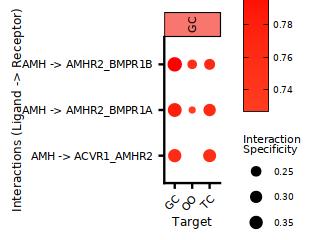

In [23]:
p=subset_gc %>%
  liana_dotplot(source_groups = c( "GC"),
                target_groups = c("OO","TC", "GC"),
                ntop = 5000, size_range = c(1, 3),)+scale_color_gradient2(low = "blue",high = "red",guide = guide_colorbar(ticks.colour = "black",frame.colour = "black"))+cowplot::theme_cowplot()+mytheme_dot
options(repr.plot.width =2.6,repr.plot.height =2)
p
ggsave("OO+GC+TC.dis20.liana.source.GC.pdf",plot=p,h=2,w=2.6)


Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


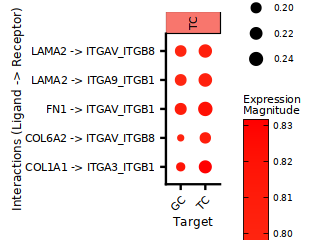

In [24]:
p=subset_tc %>%
  liana_dotplot(source_groups = c( "TC"),
                target_groups = c("OO","TC", "GC"),
                ntop = 5000, size_range = c(1, 3),)+scale_color_gradient2(low = "blue",high = "red",guide = guide_colorbar(ticks.colour = "black",frame.colour = "black"))+cowplot::theme_cowplot()+mytheme_dot
options(repr.plot.width =2.6,repr.plot.height =2)
p
ggsave("OO+GC+TC.dis20.liana.source.TC.pdf",plot=p,h=2,w=2.6)


Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


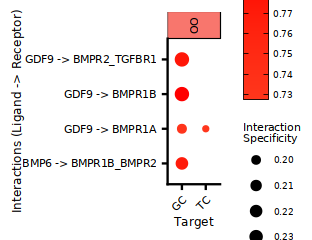

In [25]:
p=subset_oo %>%
  liana_dotplot(source_groups = c( "OO"),
                target_groups = c("OO","TC", "GC"),
                ntop = 5000, size_range = c(1, 3),)+scale_color_gradient2(low = "blue",high = "red",guide = guide_colorbar(ticks.colour = "black",frame.colour = "black"))+cowplot::theme_cowplot()+mytheme_dot
options(repr.plot.width =2.6,repr.plot.height =2)
p
ggsave("OO+GC+TC.dis20.liana.source.OO.pdf",plot=p,h=2,w=2.6)

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


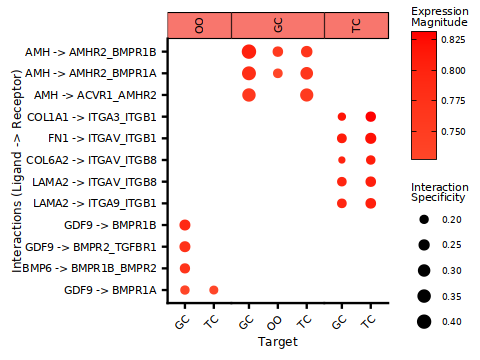

In [39]:
p=subset_oo %>%
  liana_dotplot(source_groups = c("OO","TC", "GC"),
                target_groups = c("OO","TC", "GC"),
                ntop = 5000, size_range = c(1, 3),)+scale_color_gradient2(low = "blue",high = "red",guide = guide_colorbar(ticks.colour = "black",frame.colour = "black"))+cowplot::theme_cowplot()+mytheme_dot
options(repr.plot.width =4,repr.plot.height =3)
p
ggsave("OO+GC+TC.dis20.liana.sig.pdf",plot=p,h=4,w=3)


In [35]:
write.table(liana_trunc,file="OO+GC+TC.dis20.liana.celltype.xls",sep="\t")

In [41]:
liana_trunc <- read.table("OO+GC+TC.dis20.liana.celltype.xls",header=T,check.names=F)

In [42]:
head(liana_trunc)

,source,target,ligand.complex,receptor.complex,aggregate_rank,mean_rank,natmi.edge_specificity,natmi.rank,connectome.weight_sc,connectome.rank,logfc.logfc_comb,logfc.rank,sca.LRscore,sca.rank,cellphonedb.pvalue,cellphonedb.rank
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>
1,TC,TC,MDK,LRP1,5.055909e-08,369.2,0.2023155,664,0.8264946,1,1.0100382,5,0.9335324,3,0,1173
2,GC,GC,AMH,AMHR2_BMPR1B,6.974547e-07,390.0,0.4042567,7,0.7787551,6,0.8958394,12,0.8052107,752,0,1173
3,TC,GC,MDK,SDC2,8.864847e-07,457.8,0.1743965,1088,0.7599150,11,0.8888434,13,0.9314872,4,0,1173
4,GC,TC,AMH,EGFR,3.727776e-06,591.4,0.4485937,2,0.7613721,9,0.8368722,21,0.7331351,1752,0,1173
5,GC,TC,APOE,LRP1,4.284782e-06,330.6,0.2224252,446,0.7859500,5,0.9582332,7,0.9216660,22,0,1173
6,TC,TC,LGALS3,ENG,5.240530e-06,277.4,0.2871227,107,0.7158738,17,0.9224295,11,0.9037991,79,0,1173
